# Pengolahan Gambar (Image Processing)


## OpenCV


Dengan kebangkitannya baru-baru ini di industri TI, visi komputer (CV - *computer vision*) telah menjadi salah satu bidang kecerdasan buatan (AI - *artificial intelligence*) yang paling menjanjikan. Pengolahan gambar (*image processing*), dengan demikian, adalah dasar dari CV.

Disini kita akan membahas dasar-dasarnya. Kita akan mempelajari beberapa konsep inti pemrosesan gambar dengan bantuan pustaka (*library*) OpenCV dalam bahasa pemrograman Python.


### Instalasi dan setup

Disini kita memerlukan pustaka (*library*) berikut: **NumPy** dan **OpenCV**. Pip adalah cara termudah untuk menginstal pustaka (*library*) eksternal dengan Python. Instal dengan langkah-langkah berikut.


#### Instalasi OpenCV

Untuk melakukan instalsi OpenCV dan NumPy pada windows, gunakan perintah berikut.

In [1]:
pip install numpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Untuk OS Linux, proses intalasi menggunakan perintah berikut.

`$pip3 install opencv-python`

`$pip3 install numpy`


#### Setup

Untuk meng-import OpenCV dan NumPy gunakan perintah berikut.


In [6]:
import numpy as np
import cv2


In [7]:
# Mengecek apakah OpenCV sudah terinstall
cv2.__version__


'4.6.0'

### Representasi Gambar (Representasi matematika dari sebuah gambar)

Abad kedua puluh satu adalah abad digitalisasi. Sinyal digital seperti sinyal telekomunikasi, sinyal audio, sinyal listrik mengambil alih. Gambar tidak terkecuali. Mengubah gambar menjadi bentuk digital membuat pemrosesan gambar jauh lebih mudah. Mari selami bagaimana gambar direpresentasikan dalam bentuk digital di memori komputer.


#### Gambar sebagai sebuah matriks

Gambar direpresentasikan sebagai matriks dua dimensi. Setiap elemen matriks mewakili piksel, dan setiap nilai piksel menentukan intensitas warna. Posisi piksel ditentukan oleh penempatannya di baris dan kolom yang sesuai.

Ada banyak cara representasi gambar, dengan dua yang paling populer: skala abu-abu (*grey scale*) dan RGB (*red-green-blue*). Gambar skala abu-abu adalah apa yang kita kenal sebagai gambar hitam putih, dan RGB adalah gambar polikromatik. Kita akan membahas konsep-konsep itu secara mendalam nanti.


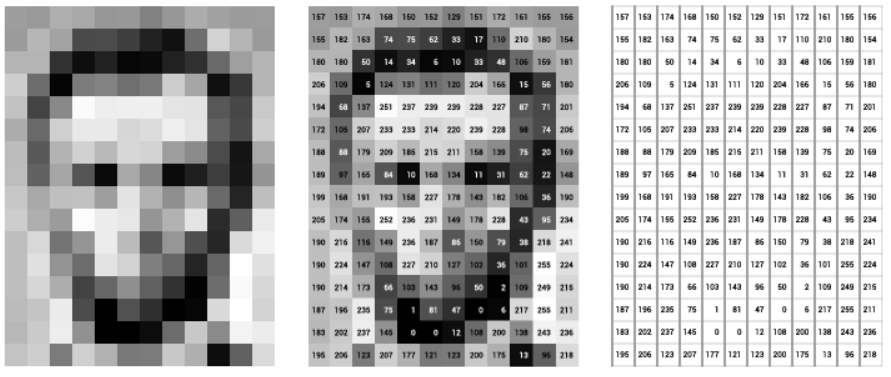

### Memuat Gambar Dengan OpenCV

Pada bagian ini kita akan memuat, menampilkan, dan menyimpan gambar. Semua gambar yang digunakan telah disertakan dalam repository.


#### Memuat sebuah gambar

Memuat gambar adalah tugas yang sangat sederhana menggunakan fungsi `imread` OpenCV. Imread mengambil dua parameter. Yang pertama adalah jalur gambar yang ingin kita muat, dan yang kedua menentukan jenis gambar yang kita inginkan (*Grey-scale, Color atau Unchanged*).

Saat kita ingin memuat gambar berwarna, parameter kedua adalah 1.

* 0 = grey-scale
* 1 = color
* 2 = unchanged


In [24]:
img_color = cv2.imread('/content/lena_color.png', 1)
# nilai 1 == cv2.IMREAD_COLOR


Saat kita ingin memuat gambar grey-scale, parameter kedua adalah 0.


In [27]:
img_grey = cv2.imread('/content/lena_color.png', 0)
# nilai 0 == cv2.IMREAD_GRAYSCALE

#### Menampilkan sebuah gambar


Menampilkan gambar dapat dilakukan dengan bantuan fungsi imshow OpenCV. Imshow juga mengambil dua parameter. String yang mewakili nama jendela tempat gambar akan ditampilkan dan nama variabel tempat gambar disimpan.


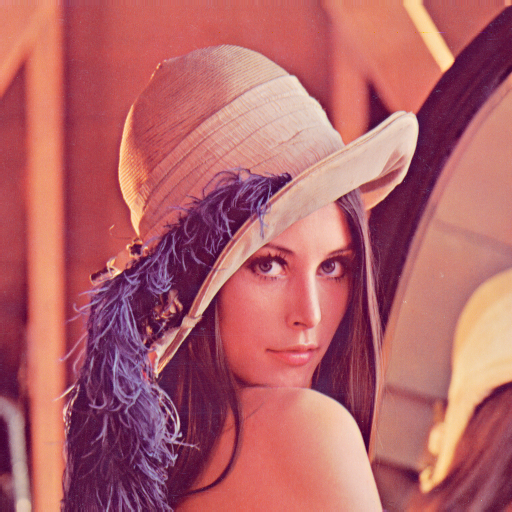

In [26]:
# Menampilkan gambar berwarna

from google.colab.patches import cv2_imshow

cv2_imshow(img_color)


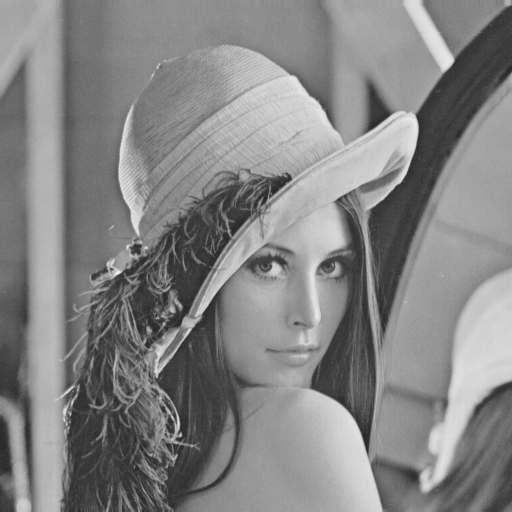

In [28]:
# Menampilkan gambar abu-abu (grey-scale)

from google.colab.patches import cv2_imshow

cv2_imshow(img_grey)


#### Menyimpan sebuah gambar

Setelah melakukan operasi tertentu, kita ingin menyimpan gambar yang diubah. Untungnya, ada fungsi untuk itu juga. Nama fungsinya adalah `imwrite`, dan juga membutuhkan dua parameter. Yang pertama adalah nama file gambar baru dan yang kedua adalah nama variabel yang menyimpan gambar yang ingin kita simpan.


In [29]:
# Menyimpan sebuah gambar berwarna
cv2.imwrite('img_color.png', img_color)

# Menyimpan sebuah gambar abu-abu
cv2.imwrite('img_grey.png', img_grey)

# Akan muncul 2 file pada folder session storage yaitu 'img_color.png' dan 'img_grey.png'
# silakan di-download


True

### Gambar sebagai sebuah array

Seperti yang telah disebutkan, gambar direpresentasikan sebagai matriks, yang merupakan struktur data dua dimensi di mana angka disusun menjadi baris dan kolom.


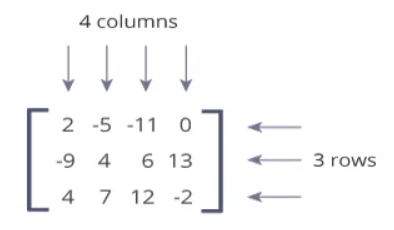

Pada contoh matriks diatas adalah memiliki 3 baris dan 4 kolom.

Di python kita tidak memiliki matriks bawaan, tetapi kita menulisnya sebagai array dari array. Jumlah array mewakili jumlah baris, dan jumlah elemen array (panjang array), mewakili jumlah kolom.

Untuk contoh konkret ini kita akan menulisnya sebagai berikut.


In [31]:
# Menentukan sebuah list dari list

A = [[2,-5,-11,0],
     [-9,4,6,13],
     [4,7,12,-2]]

print(A)


[[2, -5, -11, 0], [-9, 4, 6, 13], [4, 7, 12, -2]]


Kita juga bisa menggunakan library numpy untuk membuat matriks baru.


In [32]:
import numpy as np

A = np.array([[2,-5,-11,0],
    [-9,4,6,13],
    [4,7,12,-2]])

print(A)


[[  2  -5 -11   0]
 [ -9   4   6  13]
 [  4   7  12  -2]]


Gambar di OpenCV disimpan sebagai array numpy, perbedaannya adalah matriks yang digunakan untuk menyimpan gambar jauh lebih besar daripada matriks ini.

Sejauh ini kita telah melihat bahwa kita dapat menampilkan skala abu-abu dan gambar berwarna. Jadi apa perbedaan di antara mereka dalam hal penyimpanan?


#### Gambar abu-abu

Gambar skala keabuan terdiri dari satu saluran, atau lebih tepatnya satu matriks, di mana setiap nilai piksel mewakili intensitas piksel. Nilai piksel berkisar dari 0-255, dalam representasi uint8 atau 8-bit (setiap piksel diwakili oleh delapan bit). Lebih dekat ke 0 adalah warna yang lebih gelap, di mana 0 adalah warna hitam, secara alami nilai yang mendekati 255 lebih cerah, dengan nilai 255 adalah warna putih.

Nilai antara 0 dan 255 mewakili nuansa abu-abu. Gambar yang kita muat sebelumnya, saat disimpan dalam matriks, akan terlihat seperti ini.


In [33]:
img_grey = cv2.imread('/content/lena_color.png', 0)

# bentuk atribut mengembalikan jumlah baris dan kolom dalam matriks
print(img_grey.shape)     # => (512, 512)


(512, 512)


Kita dapat melihat bahwa gambar abu-abu Lena yang ditampilkan sebelumnya sebenarnya adalah matriks berukuran 512x512.


#### Gambar RGB

RGB adalah singkatan dari Merah-Hijau-Biru (*Red-Green-Blue*). Kita menyebutnya warna primer, alasannya adalah kita hanya dapat melihat ketiga warna itu. Setiap warna lain yang kita lihat hanyalah kombinasi dari ketiganya. Gambar berwarna menggunakan karakteristik mata manusia untuk meniru semua warna.

Pada dasarnya, citra RGB adalah tiga matriks gabungan, dimana nilai piksel dari setiap matriks mewakili bayangan dari warna yang diberikan (Merah-Hijau-Biru). Menggabungkan ketiganya, kita akan mendapatkan gambar berwarna.

Memuat gambar berwarna, akan memberi kita matriks yang terlihat seperti ini.


In [34]:
img_color = cv2.imread('/content/lena_color.png', 1)

print(img_color.shape)    # => (512, 512, 3) , nilai 3 adalah red green blue


(512, 512, 3)


Seperti yang bisa kita lihat, gambar direpresentasikan sebagai tiga matriks yang digabungkan dalam satu larik (array). Tidak seperti gambar skala abu-abu, sekarang memiliki tiga saluran dan setiap saluran mewakili satu warna. Sangat penting untuk menyebutkan bahwa di OpenCV, urutan saluran dibalik. Artinya yang pertama adalah Biru, Hijau di urutan kedua dan Merah di urutan ketiga (BGR).


### Mengindeks Gambar

Terkadang kita ingin mengubah satu bagian gambar atau hanya satu piksel. Oleh karena itu, entah bagaimana kita perlu mengakses bagian-bagian itu dan mengubah nilainya. Seperti yang kita sebutkan sebelumnya, posisi setiap piksel ditentukan oleh baris dan kolom dalam matriks gambar. Dengan itu di pikiran kita, kita akan menunjukkan bagaimana sebenarnya pengindeksan gambar dilakukan.


#### Mengakses nilai piksel

Pengindeksan gambar sangat mirip dengan pengindeksan daftar di python. Satu-satunya perbedaan adalah bahwa dalam gambar kita memiliki dua koordinat. Mari pilih satu piksel dari sebuah gambar.


In [40]:
import numpy as np
import cv2

# Pengindeksan gambar abu-abu untuk mendapatkan nilai dari satu piksel,
# indeks pertama mewakili baris dan indeks kedua mewakili kolom
pixel_value_grey = img_grey[156, 264]

print(pixel_value_grey)    # => 175


175


In [42]:
import numpy as np
import cv2

# Pengindeksan gambar abu-abu untuk mendapatkan nilai dari satu piksel,
# indeks pertama mewakili baris dan indeks kedua mewakili kolom
pixel_value_color = img_color[156, 264]

print(pixel_value_color)    # => [140 154 220]   warna blue green red


[140 154 220]


Seperti yang kita lihat, untuk gambar abu-abu, nilai piksel pada baris ke-157 dan kolom ke-265 adalah 175. Sangat penting untuk dicatat bahwa baris didahulukan, dan kolom kedua. Jika kita ingin memilih beberapa nilai piksel, kami juga dapat melakukannya persis seperti yang kami lakukan dengan list, tetapi sekali lagi kita memiliki dua koordinat.

Misalnya, mari pilih baris keempat pada gambar kita. Seperti yang kita lihat sebelumnya, gambar kita adalah larik (array) dengan dimensi 516×516 , jadi untuk satu baris kita akan mendapatkan larik dengan dimensi 1×516.


In [45]:
import numpy as np
import cv2

# Mengindeks gambar untuk memperoleh nilai dari baris ke-4
img_grey = cv2.imread('/content/lena_color.png', 0)
fourth_row = img_grey[5, :]

print(fourth_row.shape)   # => (512,)


(512,)


Kita juga bisa mendapatkan bagian dari gambar menggunakan pengindeksan interval oleh baris dan kolom. Kita akan mengambil semua baris dari 156 sampai 159, dan semua kolom 4 sampai 7. Mari kita lihat hasilnya.


In [50]:
import numpy as np
import cv2

# Mengindeks gambar untuk memperoleh nilai dari bagian sebuah gambar
img_grey = cv2.imread('/content/lena_color.png', 0)
snipped_img = img_grey[156:159, 4:7]

print(snipped_img)   # => [[111 110 110]
                    #     [110 109 109]
                    #     [106 110 112]]

print('')
print(snipped_img.shape)

[[111 110 110]
 [110 109 109]
 [106 110 112]]

(3, 3)


Kita memotong sebagian gambar dengan pengindeksan semacam ini yang sangat berguna. Juga, di Python kita memiliki sesuatu yang disebut pengindeksan logis. Terkadang kita akan membutuhkan semua piksel yang memenuhi beberapa kondisi. Mari pilih semua piksel yang sama dengan 255.


In [51]:
import numpy as np
import cv2

img_grey = cv2.imread('/content/lena_color.png', 0)

print([img_grey == 255])    # => [[False, False, False, ..., False, False, False]], logical matrix True/False
print(img_grey[img_grey == 255])    # => [], tak ada piksel yang memiliki nilai 255


[array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])]
[]


Seperti yang bisa kita lihat matriks logis kita diisi dengan nilai False, artinya tidak ada piksel yang memenuhi kondisi kita.


#### Merubah nilai piksel

Sekarang kita tahu cara mengakses nilai piksel, kita dapat dengan mudah mengubahnya. Misalnya, kita dapat menetapkan nilai piksel baru yang konstan untuk setiap posisi dalam gambar, atau kita dapat melakukan beberapa operasi matematika pada piksel terpilih untuk mengubahnya sesuai kebutuhan. Beginilah cara kedua metode bekerja.


In [53]:
import numpy as np
import cv2

# Mengindeks gambar untuk mengubah nilainya
img_grey = cv2.imread('/content/lena_color.png', 0)

# Menetapkan nilai baru ke posisi gambar
img_grey[75, 4] = 231
print(img_grey[75, 4])        # => 231
print('')

# Melakukan operasi matematika pada bagian dari sebuah gambar
img_grey[156:159, 4:7] = img_grey[156:159, 4:7] - 6
print(img_grey[156:159, 4:7]) # => [[105 104 104]
                              #     [104 103 103]
                              #     [100 104 106]]


231

[[105 104 104]
 [104 103 103]
 [100 104 106]]


#### Contoh OpenCV

Sekarang setelah kita mempelajari cara mengubah nilai piksel, mari kita lihat tampilan sebenarnya saat kita menampilkan gambar. Pertama, kita akan memuat gambar kita, dan lihat apa yang terjadi jika kita menaikkan nilai semua piksel dengan angka tertentu.


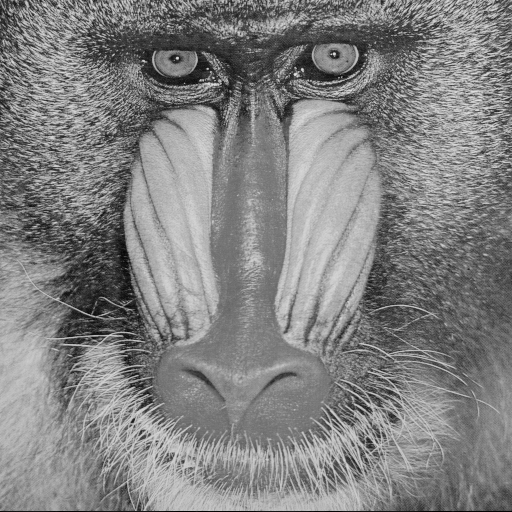

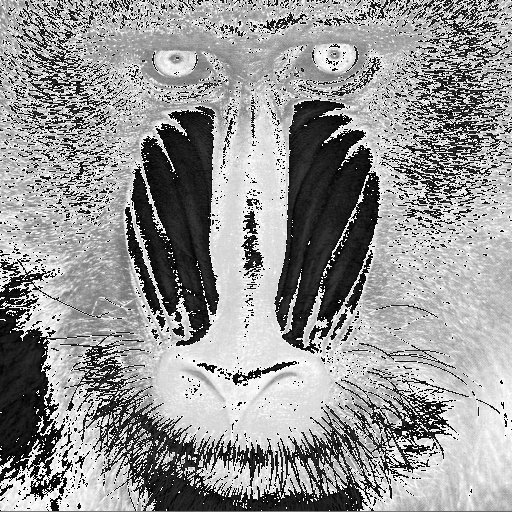

In [57]:
from google.colab.patches import cv2_imshow

img_grey_baboon = cv2.imread('/content/baboon.png', 0)
cv2_imshow(img_grey_baboon)

new_img_grey_baboon = img_grey_baboon + 100

cv2_imshow(new_img_grey_baboon)


Dengan meningkatkan semua nilai piksel sebanyak 100, gambar secara keseluruhan akan menjadi lebih cerah. Jadi mengapa area tertentu lebih gelap dari sebelumnya?

Itu karena setelah operasi jika nilai piksel melebihi 255, itu tidak akan melewatinya, melainkan berputar kembali dan mulai dari skala paling bawah.

Jadi jika sebuah piksel sebelumnya memiliki nilai 240, dan kami menambahkan 100, sekarang akan memiliki nilai 85. Biasanya, kita tidak ingin hal ini terjadi, melainkan membatasinya pada 255. Kita dapat melakukan ini dengan menggunakan fungsi `add` OpenCV. Parameter pertama menentukan gambar, dan yang kedua menentukan jumlah yang ingin kita tambahkan.


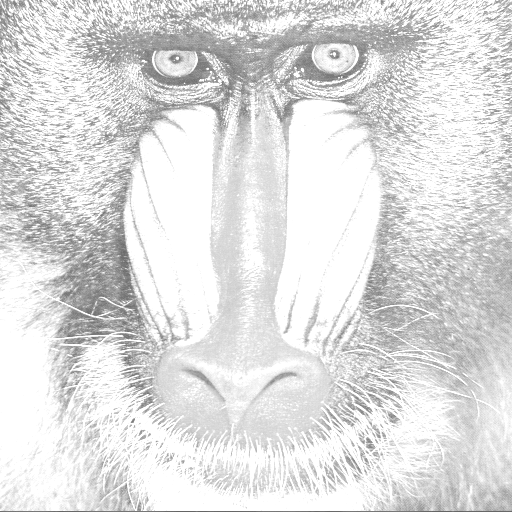

In [60]:
from google.colab.patches import cv2_imshow

img_grey_baboon_cap = cv2.add(img_grey_baboon, 100)
cv2_imshow(img_grey_baboon_cap)


Seperti yang bisa kita lihat, tidak ada warna yang lebih gelap, yang berarti nilai yang melebihi batas telah ditutup. Sekarang mari lakukan tugas sederhana untuk meningkatkan kontras di dalam gambar. Pada dasarnya, kita ingin membuat piksel terang menjadi lebih terang, dan yang gelap menjadi lebih gelap.


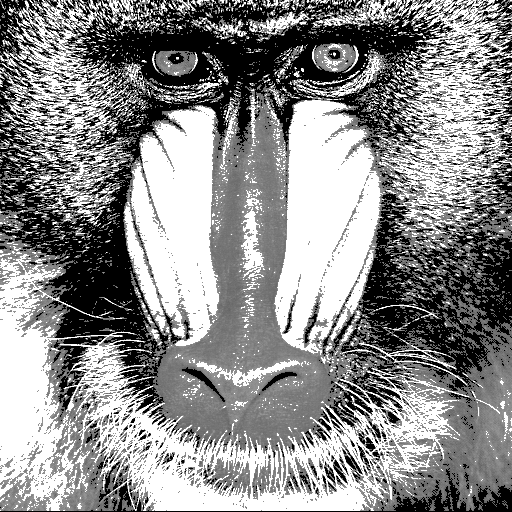

In [61]:
img_grey_baboon[img_grey_baboon > 150] = 255
img_grey_baboon[img_grey_baboon < 100] = 0

cv2_imshow(img_grey_baboon)


### Kesimpulan

Bergantung pada situasinya, kita akan menggunakan metode visualisasi, pengindeksan, dan penetapan nilai yang berbeda. Pemrosesan gambar membutuhkan banyak pengalaman dan pengetahuan. Kita baru saja membuat langkah pertama untuk mempelajari pemrosesan gambar (*image processing*) dan visi komputer (*computer vision*). Selanjutnya kita akan membahas lebih banyak konsep dasar dalam OpenCV dan Pemrosesan gambar.
